# Model Development

In this notebook, we'll develop predictive models to predict the price of the car using different variable(s)

Some of the questions that we'll deal with in this notebook are:

- Do I know if the dealer is offering fair value for my trade-in?
- Do I know if I put a fair value on my car?

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result

In [4]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# path of data 
path = 'D:\Program Files (x86)\Programming\Projects\IBM Data Analysis with Python\\automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Simple Linear Regression and Multiple Linear Regression

Linear Regression is a modeling approach that models the relationship between one or more predictor (independent) variables and one target (dependent) variable

The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable. The linear function is represented by this equation:


$$
Y = a + bX    
$$

Where:
- a refers to the intercept of the line i.e the value of Y when X = 0
- b refers to the slope of the line i.e the value with which Y changes when X increases or decreases

    

In [6]:
from sklearn.linear_model import LinearRegression

#### Simple Linear Regression using 'Highway-mpg' as independent variable

In [7]:
lm = LinearRegression()
lm

LinearRegression()

We want to see how the feature "highway-mpg" can help us predict the price of the car. Using simple linear regression, we will create a predictive model where highway-mpg is our predictor variable and price is the target variable

In [8]:
X = df[['highway-mpg']]
y = df['price']

In [9]:
lm.fit(X,y)

LinearRegression()

In [10]:
y_pred = lm.predict(X)
y_pred[0:10]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

In [11]:
#Value of intercept a

lm.intercept_

38423.305858157386

In [12]:
#value of coefficent b

lm.coef_

array([-821.73337832])

The linear function can be represented as:

<b>Price</b> = 38423 - 821 * <b>Highway-mpg</b>

#### Simple Linear Regression using engine-size as predictor variable

In [13]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [14]:
X = df[['engine-size']]
y = df['price']

In [15]:
lm1.fit(X,y)

LinearRegression()

In [16]:
y_pred = lm1.predict(X)

In [17]:
print(lm1.intercept_)
print(lm1.coef_)

-7963.338906281049
[166.86001569]


The linear function can be represented as: 

<b>Price</b> = -7963 + 166 * <b>Engine Size</b>

#### Multiple Linear Regression

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


In [33]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [34]:
lm.fit(Z,y)

LinearRegression()

In [35]:
y_pred = lm.predict(Z)

In [36]:
#Intercept of the linear equation

lm.intercept_

-15806.624626329198

In [37]:
#Coefficients of the linear equation 

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Model Evaluation Using Visualization

In [23]:
#Importing visualization packages

import seaborn as sns
%matplotlib inline

#### Regression Plot

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.
</p>

Let's visualize <b>highway-mpg</b> as a predictor variable.

(0.0, 48179.97593706212)

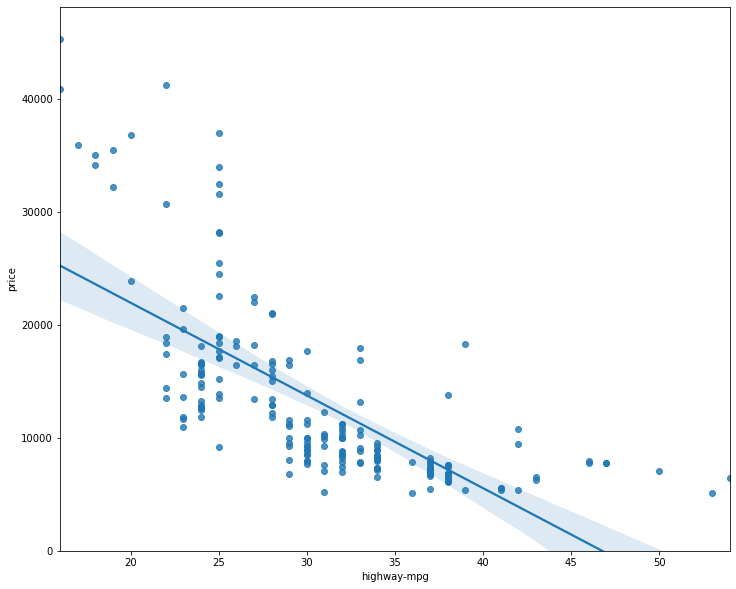

In [38]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Y_pred) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


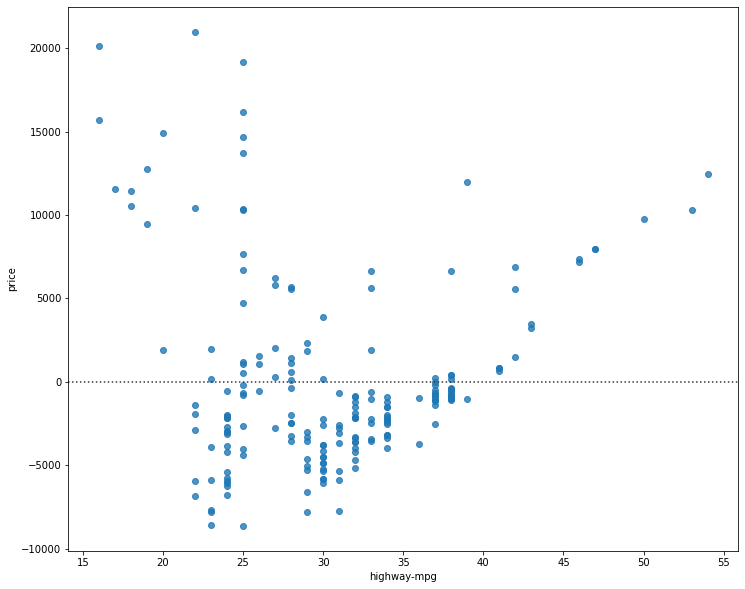

In [39]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x='highway-mpg', y='price', data=df)
plt.show()

### Distribution Plots

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


In [26]:
y_pred = lm.predict(Z)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


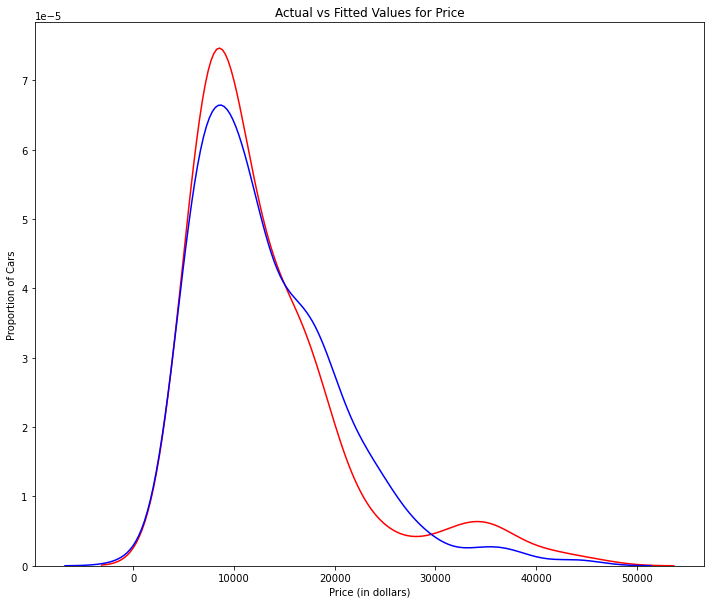

In [27]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Polynomial Regression and Pipelines

Polynomial regression is a special case of the general linear regression model. It is useful for describing curvilinear relationships.

We get a non-linear or curvilinear relationship by squaring or setting higher order terms of the predictor variables.

There are many different orders of polynomial regression:

<center><b>Quadratic - 2nd Order</b></center>
$$
Y = a + b_1 X +b_2 X^2 
$$
<br>

<center><b>Cubic - 3rd Order</b></center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$
<br>
<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


We can perform a polynomial transform on multiple features.


In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [30]:
Z_pr = pr.fit_transform(Z)

In [31]:
Z.shape

(201, 4)

In [32]:
Z_pr.shape

(201, 15)

### Pipelining

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create a pipeline by creating a list of tuples that includes the name of the model and other parameters like PolynomialFeatures or StandardScaler.

In [42]:
Input = [('scale', StandardScaler()), ('polynomial_feature', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

In [43]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial_feature', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
Z = Z.astype('float')
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial_feature', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
y_pipe = pipe.predict(Z)
y_pipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

### Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


#### Example 1: Simple Linear Regression

Let's calculate the R^2 first

In [46]:
lm.fit(X,y)

print("The R-square is: ", lm.score(X,y))

The R-square is:  0.7609686443622008


Let's calculate the MSE:

In [47]:
y_pred = lm.predict(X)
y_pred[:10]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775, 14729.62322775, 14729.62322775, 14729.62322775,
       13895.32314929, 10057.54278839])

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
#Comparing the predicted values with actual values

mse = mean_squared_error(y, y_pred)

print("The Mean Squared Error is: ", mse)

The Mean Squared Error is:  15021126.02517414


### Example 2: Multiple Linear Regression


In [50]:
lm.fit(Z, y)

#Find the R^2
print("The R-square is: ", lm.score(Z, y))

The R-square is:  0.8093562806577457


In [51]:
y_pred_multifit = lm.predict(Z)

In [52]:
print("The Mean Squared Error is: ", mean_squared_error(y_pred_multifit, y))

The Mean Squared Error is:  11980366.87072649


## Prediction and Decision Making

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

### Simple Linear Regression Model vs Multiple Linear Regression Model 

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>
​
<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>
​
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.
​

### Conclusion

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset.